# **Problem Statement**
The goal of this analysis is to explore and identify key factors that influence the performance of Home Depot's digital ad campaigns. By analyzing the impact of variables such as `Traffic`, `CPM`, and `Ad Spend` on `Sales` and `Ad Impressions`, we aim to provide actionable insights and strategies for the pricing team to optimize CPM-based pricing and maximize revenue. The analysis will focus on understanding campaign efficiency and making data-driven recommendations for improving overall ad performance.

### **Objectives:**
1. Analyze the relationship between key metrics like `CPM`, `Traffic`, `Ad Impressions`, `Ad Spend`, and `Sales`.
2. Identify key drivers that significantly impact revenue generation and overall campaign performance.
3. Provide actionable recommendations to optimize CPM-based pricing and allocate ad spend more effectively.


# **Dataset Description**
The dataset provided for the analysis contains the following features:

1. **Date**: Start date of the week (i.e., Monday) when the data was recorded.
2. **Taxonomy**: Product page on The Home Depot website. This indicates the category or type of product where the ad was displayed.
3. **Campaign ID**: Unique identifier for each ad campaign. Campaigns have a minimum duration of one week.
4. **Traffic**: Number of visits or views on the product page where the ad is displayed.
5. **Ad Impressions**: Number of times the ad was viewed. An impression is counted when at least 50% of the ad appears on the screen for at least 2 seconds.
6. **CPM (Cost Per Mille)**: Cost of the advertisement per thousand impressions.
7. **Ad Spend**: Total amount spent on the ad campaign during that week.
8. **Booking Lead Time**: Time in days between booking the campaign and its start date.
9. **Sales**: Revenue generated from the ad campaign during the week.

### **Dataset Overview:**
- **Number of Rows:** 229,006
- **Number of Columns:** 9
- **Missing Values:** Approximately 17% missing data in columns like `Campaign ID`, `Ad Impressions`, `Ad Spend`, `Booking Lead Time`, and `Sales`.

### **Variable Descriptions and Potential Insights:**
- **Traffic:** Indicates the interest and activity on the product page. Higher traffic might lead to better ad performance.
- **Ad Impressions:** Directly tied to the visibility of the ad. More impressions could lead to higher sales if the campaign is effective.
- **CPM:** Helps in understanding the cost efficiency of ad campaigns. High CPM with low sales might indicate inefficiencies.
- **Ad Spend:** Direct monetary investment in the campaign. Analyzing its relationship with `Sales` is crucial.
- **Sales:** Primary metric of interest. Understanding what drives sales is the key goal of this analysis.

### **Next Steps:**
1. Conduct initial data inspection and cleaning.
2. Perform exploratory data analysis (EDA) to understand the relationships between the variables.


In [3]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "BPC Case Study - V4 (reviewed) (3).xlsx"  # Update this path based on your file location in Google Colab
data = pd.read_excel(file_path, sheet_name="Data")


In [4]:
# Display dataset information
print("### Dataset Information:")
data.info()

### Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229006 entries, 0 to 229005
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               229006 non-null  datetime64[ns]
 1   Taxonomy           229006 non-null  object        
 2   Campaign ID        189731 non-null  float64       
 3   Traffic            229006 non-null  int64         
 4   Ad impressions     189731 non-null  float64       
 5   CPM                229006 non-null  float64       
 6   Ad spend           189731 non-null  float64       
 7   Booking Lead Time  189731 non-null  float64       
 8   Sales              189731 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 15.7+ MB


In [5]:
# Display first few rows of the dataset
print("\n### First Few Rows of the Dataset:")
print(data.head())



### First Few Rows of the Dataset:
        Date   Taxonomy   Campaign ID  Traffic  Ad impressions      CPM  \
0 2021-12-27  Appliances        789.0   186565        111939.0  35.6850   
1 2022-01-03  Appliances       2503.0   735673        426690.0  43.0220   
2 2022-01-10  Appliances       4243.0   565996        181119.0  42.3200   
3 2022-01-17  Appliances       6082.0   778248        326864.0  61.2000   
4 2022-01-24  Appliances       8051.0   473789        161088.0  39.1298   

       Ad spend  Booking Lead Time         Sales  
0  3.994543e+06                7.0  2.796180e+07  
1  1.835706e+07               10.0  3.487841e+08  
2  7.664956e+06                7.0  9.964443e+07  
3  2.000408e+07               12.0  3.200652e+08  
4  6.303341e+06               13.0  1.827969e+08  


In [6]:

# Check for missing values
print("\n### Missing Values in Each Column:")
print(data.isnull().sum())



### Missing Values in Each Column:
Date                     0
Taxonomy                 0
Campaign ID          39275
Traffic                  0
Ad impressions       39275
CPM                      0
Ad spend             39275
Booking Lead Time    39275
Sales                39275
dtype: int64


In [7]:

# Display summary statistics
print("\n### Summary Statistics:")
print(data.describe())


### Summary Statistics:
                                Date    Campaign ID       Traffic  \
count                         229006  189731.000000  2.290060e+05   
mean   2022-12-28 09:49:03.465236736   95320.183976  4.463512e+04   
min              2021-12-27 00:00:00       1.000000  1.000000e+00   
25%              2022-06-27 00:00:00   47822.000000  2.051000e+03   
50%              2023-01-02 00:00:00   95046.000000  9.082000e+03   
75%              2023-07-03 00:00:00  143024.000000  3.202300e+04   
max              2023-12-25 00:00:00  190494.000000  1.698931e+07   
std                              NaN   54949.199290  2.256816e+05   

       Ad impressions            CPM      Ad spend  Booking Lead Time  \
count    1.897310e+05  229006.000000  1.897310e+05      189731.000000   
mean     2.304315e+04      38.261163  8.489492e+05           9.500714   
min      0.000000e+00       0.007000  0.000000e+00           4.000000   
25%      1.549000e+03      21.457200  3.130290e+04           

# **Exploratory Data Analysis (EDA)**

The objective of EDA is to gain deeper insights into the dataset and understand relationships between variables. This step will help us identify patterns, correlations, and potential anomalies that can influence the performance of Home Depot's digital ad campaigns.

### **EDA Approach:**

1. **Univariate Analysis:**
   - Explore the distribution of each variable individually.
   - Identify trends, outliers, and skewness in key metrics like `CPM`, `Traffic`, `Sales`, and `Ad Impressions`.
   - Visualize the distribution using histograms and KDE plots for continuous variables and bar plots for categorical variables like `Taxonomy`.

2. **Bivariate Analysis:**
   - Analyze relationships between two variables.
   - Use scatter plots to visualize the relationship between variables like `Ad Spend` vs. `Sales` or `CPM` vs. `Ad Impressions`.
   - Create correlation matrices to identify strong relationships and potential drivers of ad performance.

3. **Multivariate Analysis:**
   - Investigate interactions between multiple variables.
   - Use pair plots to visualize relationships between several variables simultaneously, such as `Traffic`, `Ad Impressions`, `CPM`, and `Sales`.
   - Identify combinations of variables that contribute significantly to campaign success.

### **Key Questions to Address During EDA:**
- What is the distribution of `Sales`, `CPM`, and `Ad Impressions`?
- Are there strong correlations between `CPM`, `Traffic`, and `Sales`?
- How do different `Taxonomy` categories impact `Sales` or `Ad Impressions`?
- Are there any notable outliers that could skew the analysis?

### **Visualizations and Insights:**
- Use histograms and KDE plots to understand distributions.
- Use scatter plots and heatmaps to identify relationships.
- Document key insights and patterns observed during EDA.

After completing EDA, we will have a clearer understanding of the data and be better equipped to define hypotheses and build predictive models.


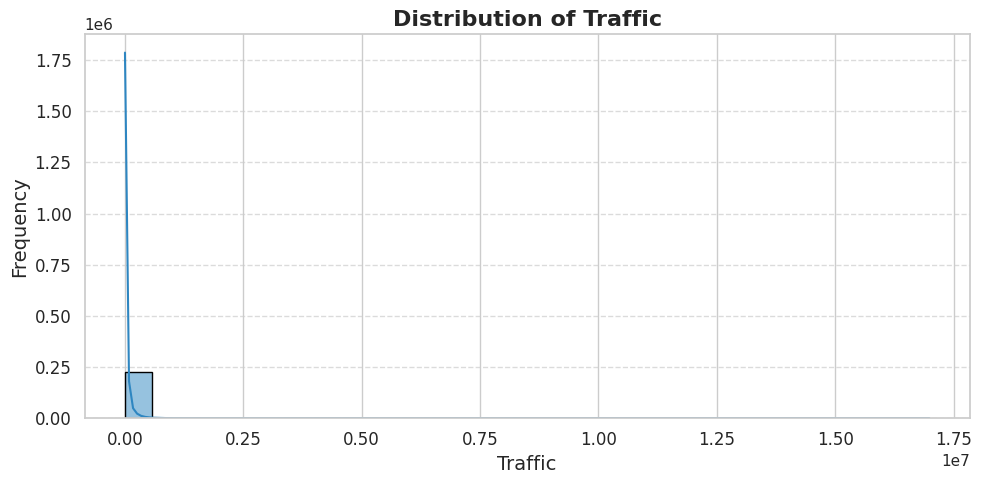

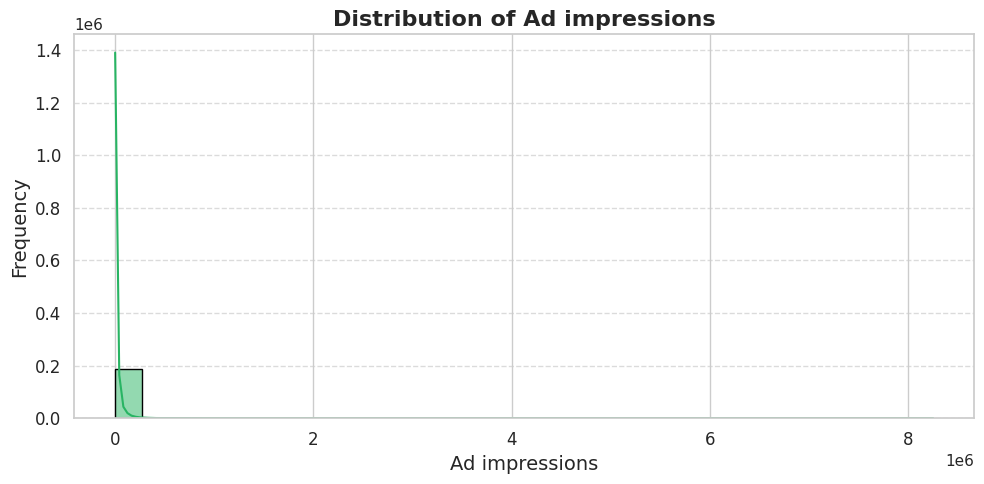

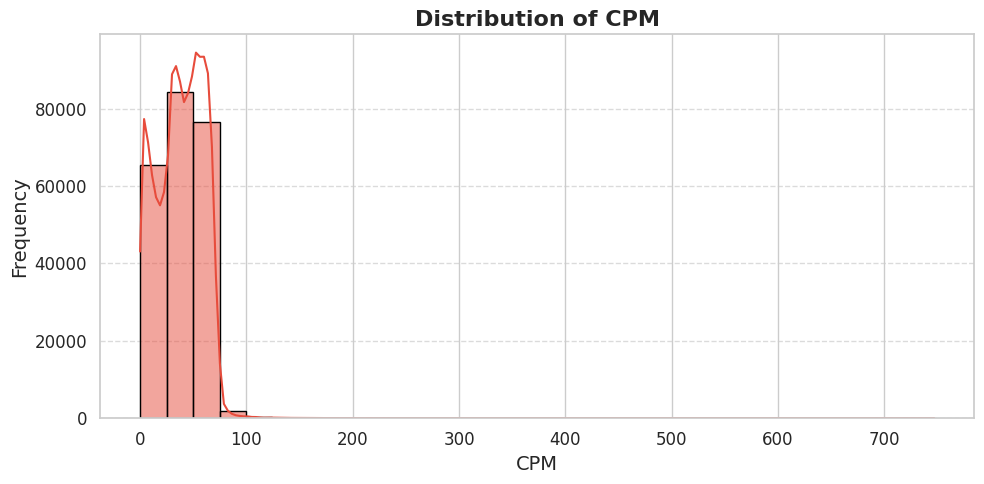

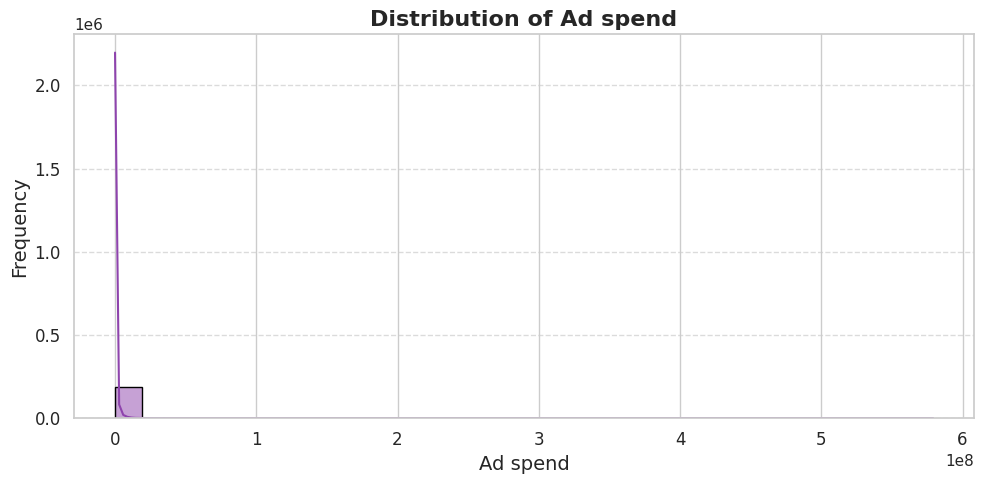

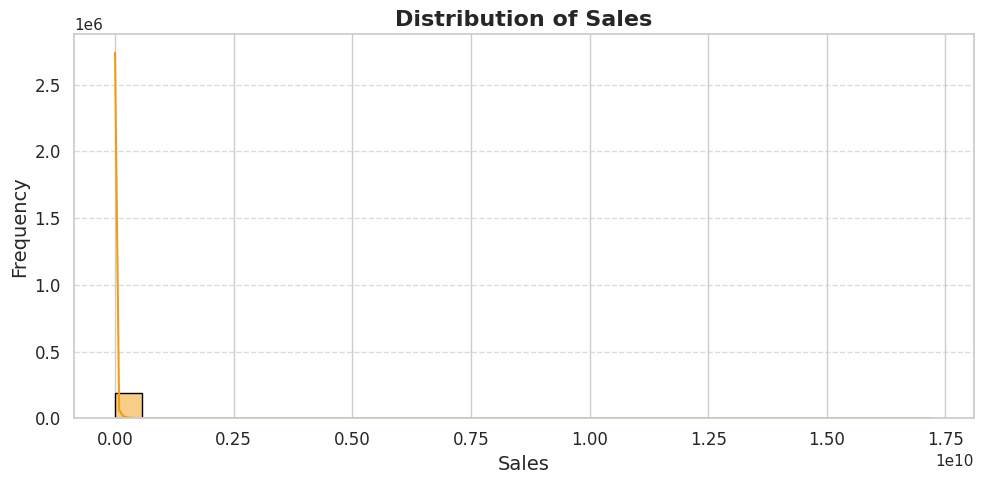

In [8]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style="whitegrid")

# Define a list of colors for each plot
colors = ['#2E86C1', '#28B463', '#E74C3C', '#8E44AD', '#F39C12']  # Darker colors for better visibility

# Univariate Analysis: Plot histograms for continuous variables with improved contrast and annotations
continuous_vars = ['Traffic', 'Ad impressions', 'CPM', 'Ad spend', 'Sales']
for i, var in enumerate(continuous_vars):
    plt.figure(figsize=(10, 5))
    sns.histplot(data[var].dropna(), kde=True, bins=30, color=colors[i], edgecolor='black')  # Adding edge color for better definition
    plt.title(f'Distribution of {var}', fontsize=16, fontweight='bold')  # Increased font size and bold title
    plt.xlabel(var, fontsize=14)  # Increased font size for x-axis label
    plt.ylabel('Frequency', fontsize=14)  # Increased font size for y-axis label
    plt.xticks(fontsize=12)  # Set font size for x-ticks
    plt.yticks(fontsize=12)  # Set font size for y-ticks
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()


### Insights and Implications from Univariate Analysis

1. **Distribution of Traffic:**
   - **Insight:** The distribution of `Traffic` is highly right-skewed, indicating that most product pages have low traffic, while only a few pages have extremely high traffic.
   - **Implication:** This skewness suggests that a small number of product pages are driving the majority of views, which could mean that popular product categories or certain campaigns attract significantly more attention than others.

2. **Distribution of Ad Impressions:**
   - **Insight:** Similar to `Traffic`, the distribution of `Ad Impressions` is also highly skewed to the right. This suggests that most ads receive a relatively low number of impressions, while a few ads have exceptionally high impressions.
   - **Implication:** The concentration of impressions on a few ads might indicate a disparity in visibility across campaigns. This could be a point of interest for optimizing ad allocation and improving visibility for underperforming ads.

3. **Distribution of CPM (Cost Per Mille):**
   - **Insight:** The CPM distribution is concentrated between 0 and 100, with a very small number of campaigns having extremely high CPMs (greater than 100).
   - **Implication:** This concentration suggests that most campaigns are priced similarly, but a few outliers with high CPMs may either reflect premium ad placements or inefficiencies in pricing. Further analysis is required to understand whether these high CPMs correlate with higher sales or other key metrics.

4. **Distribution of Ad Spend:**
   - **Insight:** The `Ad Spend` distribution is extremely right-skewed, indicating that while most campaigns have low to moderate spending, a few campaigns have exceptionally high spending.
   - **Implication:** This skewness might indicate that a large portion of the budget is being allocated to a small number of campaigns. This could warrant an investigation into the effectiveness of these high-budget campaigns in terms of return on investment (ROI).

5. **Distribution of Sales:**
   - **Insight:** The `Sales` distribution shows a similar pattern, with most campaigns generating low to moderate sales, while a few generate extremely high sales.
   - **Implication:** A small number of highly successful campaigns are driving most of the revenue. Understanding what factors contribute to these high-revenue campaigns can help replicate their success across other campaigns.


Column Names After Stripping Spaces: Index(['Date', 'Taxonomy', 'Campaign ID', 'Traffic', 'Ad impressions', 'CPM',
       'Ad spend', 'Booking Lead Time', 'Sales'],
      dtype='object')
Number of Unique Categories in 'Taxonomy': 2380
Top 20 Categories:
 Taxonomy
Appliances                                                                                                      105
Outdoors|Pools|Pool Supplies|Pool Equipment|Pool Cleaning Supplies|Pool Hoses                                   105
Plumbing                                                                                                        105
Outdoors|Pools|Swim Gear                                                                                        105
Outdoors|Pools|Pool Supplies|Pool Toys                                                                          105
Outdoors|Pools|Pool Supplies|Pool Liners|Pool Liner Accessories                                                 105
Outdoors|Pools|Pool Supplies|Pool Liners

<ipython-input-9-86161430f45f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Taxonomy', data=data[data['Taxonomy'].isin(top_taxonomies.index)], order=top_taxonomies.index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packag

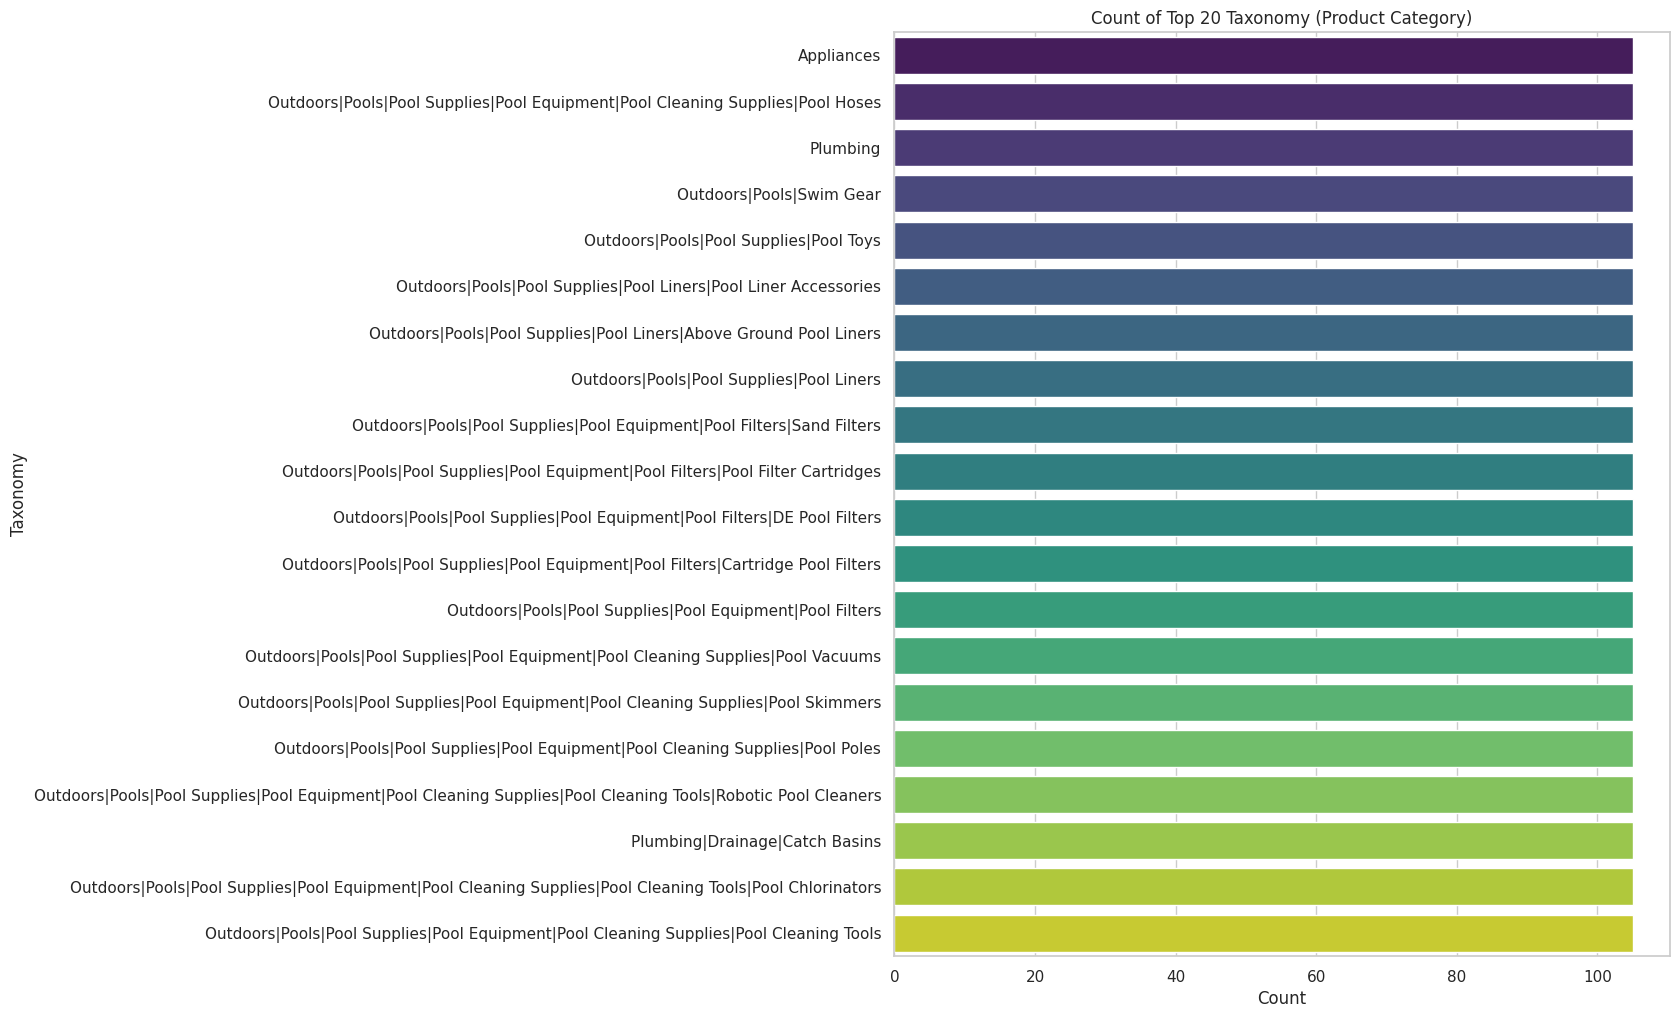

In [9]:
# Step 1: Check and strip column names to remove spaces
data.columns = data.columns.str.strip()
print("Column Names After Stripping Spaces:", data.columns)

# Step 2: Display the count of unique categories in 'Taxonomy'
print(f"Number of Unique Categories in 'Taxonomy': {data['Taxonomy'].nunique()}")

# Step 3: Display the top 20 categories to get a sense of the most frequent Taxonomies
top_taxonomies = data['Taxonomy'].value_counts().nlargest(20)
print("Top 20 Categories:\n", top_taxonomies)

# Step 4: Plot the count plot for only the top 20 categories
plt.figure(figsize=(10, 12))  # Increase height to accommodate all categories
sns.countplot(y='Taxonomy', data=data[data['Taxonomy'].isin(top_taxonomies.index)], order=top_taxonomies.index, palette='viridis')
plt.title('Count of Top 20 Taxonomy (Product Category)')
plt.xlabel('Count')
plt.ylabel('Taxonomy')
plt.show()


### Insights and Implications from Top 20 `Taxonomy` Categories

1. **Insight:**
   - The distribution of the top 20 product categories (`Taxonomy`) shows that they all have the same count of 105.
   - The most frequent categories are:
     - `Appliances`
     - Multiple pool-related categories such as `Outdoors|Pools|Pool Supplies|Pool Equipment|Pool Cleaning Supplies|Pool Hoses`
     - `Plumbing`

2. **Implication:**
   - **Uniform Count:** The uniform count of 105 for each category suggests that the data might have been aggregated or truncated to this specific count. This could potentially indicate that only a subset of campaigns has been selected for analysis.
   - **Focus on Pool Supplies and Outdoors:** A significant number of top categories are related to pool supplies and outdoor equipment, implying a focus on seasonal products or categories that are highly promoted during certain times of the year.
   - **Recommendation for Further Analysis:**
     - Delve deeper into why these categories have such high counts—whether it's due to their popularity, higher revenue potential, or increased marketing efforts.

3. **Additional Considerations:**
   - **Check for Data Integrity:** Confirm that the uniform counts are not due to data integrity issues. For example, ensure there is no duplication or missing entries that could skew the analysis.
   - **Analyze the Impact on Sales:** Investigate whether these frequently advertised categories correspond to higher `Sales` or better `CPM` performance. This will help understand if the emphasis on these categories is justified in terms of revenue generation.


<ipython-input-10-a6b0cb70797b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aggregated_counts.values, y=aggregated_counts.index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When

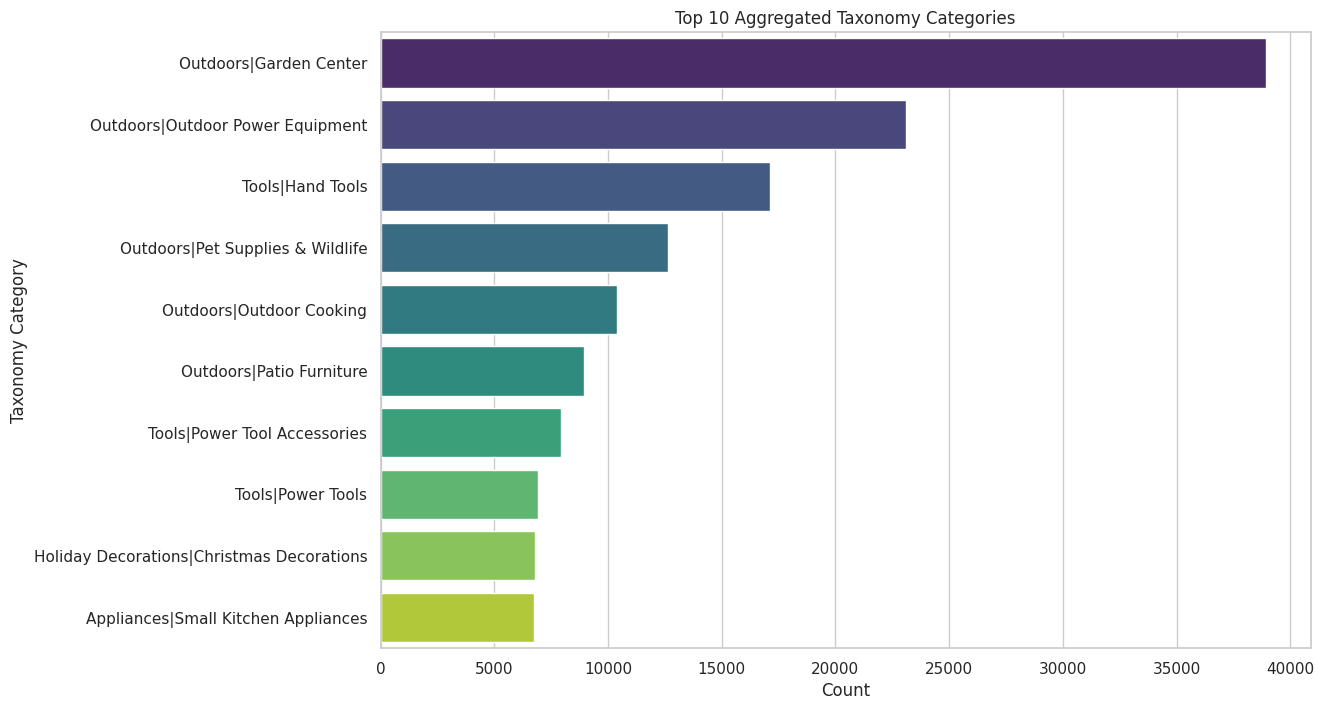

In [10]:
# Step 1: Group similar categories under broader themes
# For simplicity, let's create a new column called 'Taxonomy_Aggregated' based on the first two levels of the taxonomy

data['Taxonomy_Aggregated'] = data['Taxonomy'].apply(lambda x: '|'.join(x.split('|')[:2]) if pd.notnull(x) else x)

# Step 2: Calculate the count of each aggregated taxonomy
aggregated_counts = data['Taxonomy_Aggregated'].value_counts().nlargest(10)  # Top 10 categories only

# Step 3: Create a horizontal bar plot for the top 10 aggregated categories
plt.figure(figsize=(12, 8))  # Increase figure size for better visibility
sns.barplot(x=aggregated_counts.values, y=aggregated_counts.index, palette='viridis')
plt.title('Top 10 Aggregated Taxonomy Categories')
plt.xlabel('Count')
plt.ylabel('Taxonomy Category')
plt.show()


### Insights from the Top 10 Aggregated `Taxonomy` Categories

1. **Dominance of 'Outdoors' Categories:**
   - The top 10 aggregated categories are heavily skewed towards outdoor-related product categories such as:
     - `Outdoors|Garden Center`
     - `Outdoors|Outdoor Power Equipment`
     - `Outdoors|Pet Supplies & Wildlife`
     - `Outdoors|Outdoor Cooking`
     - `Outdoors|Patio Furniture`
   - The `Outdoors|Garden Center` category has the highest count, significantly more than the others, indicating a strong focus or demand for garden-related products.

2. **Distribution of Categories:**
   - The `Outdoors|Garden Center` category has approximately 40,000 counts, almost double that of the second-highest category, `Outdoors|Outdoor Power Equipment`.
   - This significant difference suggests that garden center products are a major focus for Home Depot, possibly due to their popularity, seasonality, or profitability.

3. **Balance Across Tool-Related Categories:**
   - Categories such as `Tools|Hand Tools` and `Tools|Power Tools` are also present in the top 10, but their counts are considerably lower than the outdoor categories.
   - This indicates that, while tools are important, they are not as prominent in terms of campaign frequency or focus compared to outdoor categories.

4. **Seasonal Products:**
   - The presence of `Holiday Decorations|Christmas Decorations` in the top 10 suggests a seasonal emphasis, highlighting the importance of holiday-related product categories.

5. **Diverse Product Categories:**
   - The top 10 categories include a mix of outdoor, tool, appliance, and seasonal products, showcasing Home Depot's diverse product range.
   - However, outdoor and gardening categories dominate the list, suggesting that these are key areas of interest or sales drivers for the company.

### Implications:

1. **Strategic Focus on Outdoor Products:**
   - Home Depot appears to have a strong focus on outdoor and garden-related products, which may be due to high customer interest or strategic prioritization. Marketing efforts could further leverage this insight by promoting related categories during peak seasons.

2. **Opportunities for Tool and Appliance Categories:**
   - The lower counts for tool and appliance categories indicate potential areas for increased marketing or campaign efforts to boost visibility and engagement.

3. **Seasonal Marketing Strategy:**
   - The inclusion of Christmas decorations in the top 10 suggests that Home Depot is effectively capitalizing on seasonal trends. Exploring other seasonal opportunities (e.g., summer or spring campaigns) might yield further benefits.


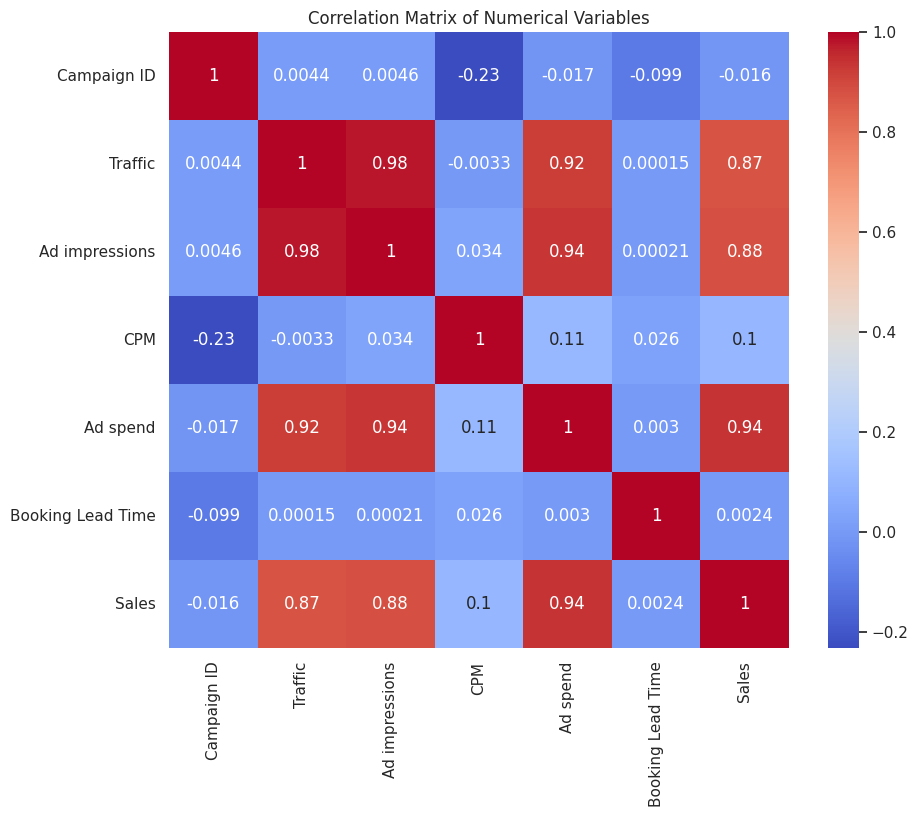

In [11]:
# Select only numeric columns for the correlation matrix
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = data[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


### Analysis of the Correlation Matrix

The correlation matrix provides an overview of the relationships between the numerical variables in the dataset. The values range from -1 to 1, where:
- **1** indicates a perfect positive correlation.
- **-1** indicates a perfect negative correlation.
- **0** indicates no correlation.

#### Key Insights from the Correlation Matrix:

1. **Strong Positive Correlation Between `Traffic` and `Ad Impressions` (0.98):**
   - There is a very strong positive correlation between `Traffic` and `Ad Impressions`.
   - **Implication:** As the number of visitors (`Traffic`) to a product page increases, the number of ad impressions also increases proportionally. This is expected because more page views generally lead to more ad views.

2. **Strong Positive Correlation Between `Ad Spend` and `Sales` (0.94):**
   - `Ad Spend` and `Sales` have a high positive correlation of 0.94.
   - **Implication:** Higher spending on ad campaigns is associated with higher sales. This suggests that investing more in advertising leads to increased revenue, highlighting the effectiveness of ad spend in driving sales.

3. **High Positive Correlation Between `Ad Impressions` and `Sales` (0.88):**
   - `Ad Impressions` and `Sales` also show a strong correlation.
   - **Implication:** The more frequently ads are displayed to customers, the more likely it is to result in higher sales. This indicates the importance of optimizing ad visibility.

4. **Moderate Positive Correlation Between `Traffic` and `Sales` (0.87):**
   - There is a strong positive correlation between `Traffic` and `Sales`.
   - **Implication:** Increased traffic to product pages is associated with higher sales, which shows that getting more visitors to the website is a key driver of revenue.

5. **Low Correlation of `CPM` with Other Variables:**
   - The `CPM` (Cost Per Mille) variable has a low correlation with other variables, with a maximum correlation of 0.11 with `Ad Spend`.
   - **Implication:** The cost of advertisements per 1,000 impressions (CPM) does not directly impact traffic, impressions, or sales. This could suggest that while CPM is a pricing strategy, it may not have a strong influence on campaign effectiveness compared to other variables.

6. **Negligible Correlation of `Booking Lead Time` with Other Variables:**
   - `Booking Lead Time` shows almost no correlation with other variables, indicating it has minimal impact on campaign performance.
   - **Implication:** The time between booking the campaign and its start date does not appear to affect traffic, ad impressions, ad spend, or sales.

### Recommendations Based on Insights:

1. **Focus on Ad Spend and Impressions:**
   - Given the strong correlation between `Ad Spend` and `Sales`, and `Ad Impressions` and `Sales`, further optimize campaigns by increasing investment in high-performing ad impressions.

2. **Traffic Optimization:**
   - As `Traffic` strongly correlates with both `Ad Impressions` and `Sales`, efforts to drive more traffic through SEO, promotions, and partnerships can positively impact overall campaign performance.

3. **Explore the Role of CPM:**
   - The low correlation of `CPM` suggests that its impact might be more indirect. Consider exploring this further through segmentation or deeper analysis to see if CPM has a differential impact on certain types of campaigns.



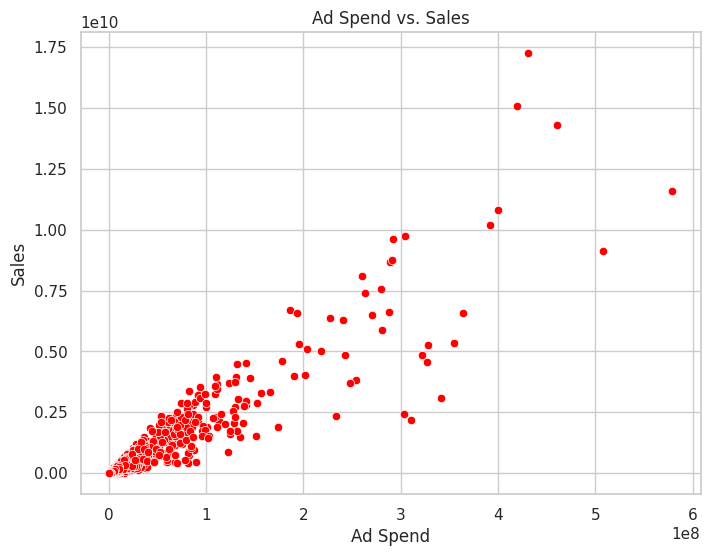

In [12]:
# Bivariate Analysis: Scatter Plots for key relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ad spend', y='Sales', data=data, color='red')
plt.title('Ad Spend vs. Sales')
plt.xlabel('Ad Spend')
plt.ylabel('Sales')
plt.show()



### Insights from the Scatter Plot: `Ad Spend` vs. `Sales`

The scatter plot visualizes the relationship between `Ad Spend` and `Sales`, providing valuable insights into how advertising expenditures impact sales.

#### Key Insights:
1. **Positive Relationship:**
   - The scatter plot shows a strong positive relationship between `Ad Spend` and `Sales`.
   - **Implication:** As `Ad Spend` increases, `Sales` tend to increase as well, suggesting that higher investment in advertising is generally associated with higher sales.

2. **Concentration at Lower `Ad Spend` Levels:**
   - A large number of points are concentrated near the lower `Ad Spend` levels (closer to zero), which is indicative of many campaigns with relatively low budget allocations.
   - **Implication:** This concentration suggests that many campaigns operate on smaller budgets, potentially targeting niche markets or short-term promotions.

3. **Outliers with High `Ad Spend` and Sales:**
   - A few points are observed with very high `Ad Spend` and correspondingly high `Sales` values.
   - **Implication:** These outliers may represent large-scale campaigns or premium ad placements that contribute significantly to overall sales. These campaigns warrant closer examination to understand their unique characteristics.

4. **Linear Trend:**
   - The overall pattern of points suggests a linear trend between `Ad Spend` and `Sales`.
   - **Implication:** A linear regression model might be suitable to predict `Sales` based on `Ad Spend`. This trend also indicates that increasing ad budgets can be an effective strategy to boost sales up to a certain point.

5. **Potential Saturation Point:**
   - At extremely high `Ad Spend` levels (above $4 million), there is less variation in `Sales`, suggesting a potential point of diminishing returns.
   - **Implication:** Beyond a certain level of `Ad Spend`, additional investments might not yield proportional increases in sales. It’s essential to optimize ad budgets to avoid overspending without gaining significant returns.

### Recommendations:
1. **Optimize Ad Spend for Maximum Returns:**
   - Based on the observed linear relationship, identify the optimal `Ad Spend` levels that maximize sales without reaching a saturation point.

2. **Analyze High-Budget Campaigns:**
   - Investigate the characteristics of high `Ad Spend` and high `Sales` campaigns to replicate their success in other campaigns.

3. **Consider a Predictive Model:**
   - Use a linear regression model to predict sales based on `Ad Spend` and derive insights for budget allocation.



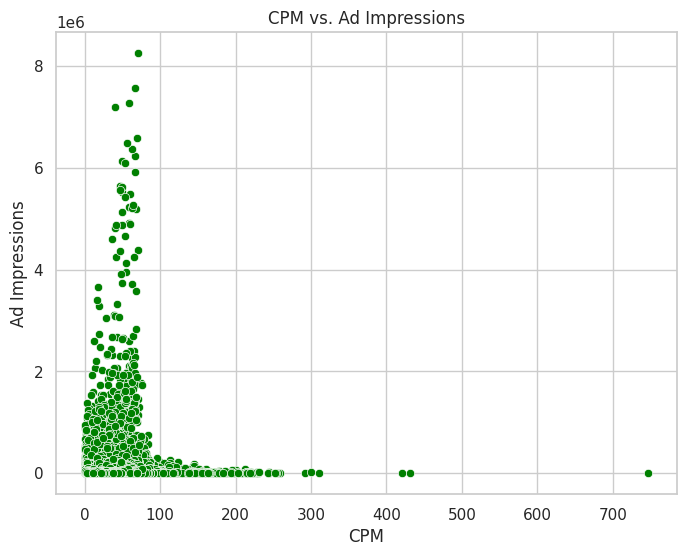

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CPM', y='Ad impressions', data=data, color='green')
plt.title('CPM vs. Ad Impressions')
plt.xlabel('CPM')
plt.ylabel('Ad Impressions')
plt.show()



### Insights from the Scatter Plot: `CPM` vs. `Ad Impressions`

The scatter plot visualizes the relationship between `CPM` (Cost Per Mille) and `Ad Impressions`, providing insights into how the cost of ads impacts the number of times an ad is shown.

#### Key Insights:
1. **Inverse Relationship:**
   - There appears to be an inverse relationship between `CPM` and `Ad Impressions`. As `CPM` increases, the number of `Ad Impressions` tends to decrease.
   - **Implication:** Higher `CPM` values are associated with fewer impressions, suggesting that more expensive ads are shown less frequently. This could be due to budget constraints or targeted ad placements where fewer impressions are needed to achieve desired results.

2. **Concentration of Points at Low `CPM` and High `Ad Impressions`:**
   - Most points are clustered at lower `CPM` values (between 0 and 100) and high `Ad Impressions` (up to 6 million).
   - **Implication:** The majority of campaigns operate at a lower cost per thousand impressions, achieving higher visibility. This could indicate a strategy to maximize reach at minimal costs or reflect ad campaigns with broader targeting criteria.

3. **Sparse Distribution at High `CPM` Values:**
   - There are very few points beyond `CPM` values of 200, and these points correspond to very low `Ad Impressions`.
   - **Implication:** High `CPM` ads are likely used for premium placements or very targeted campaigns where fewer impressions are necessary. These might be specialized campaigns aimed at high-value customers.

4. **Outliers at High `CPM` Values:**
   - A few points have extremely high `CPM` values (up to 700) but generate very few impressions.
   - **Implication:** These outliers might represent highly expensive ad placements, possibly due to niche targeting or prime ad slots, where even a few impressions are considered valuable.

5. **Overall Pattern:**
   - The overall pattern indicates that campaigns with lower `CPM` values tend to achieve a larger number of impressions, suggesting that lower-cost ads are more effective at generating visibility.

### Recommendations:
1. **Optimize CPM for Desired Impressions:**
   - To maximize ad visibility, consider optimizing `CPM` to achieve a balance between cost and impressions. Higher `CPM` values should be reserved for targeted campaigns where fewer but more impactful impressions are desired.

2. **Investigate High CPM Campaigns:**
   - Analyze campaigns with very high `CPM` values and low impressions to understand the context and objective behind these campaigns. Are they premium placements, or is there an opportunity to optimize costs?

3. **Leverage Low CPM Campaigns for Broader Reach:**
   - Given the effectiveness of low `CPM` campaigns in achieving higher impressions, consider allocating more budget to these types of campaigns if the goal is to maximize reach.


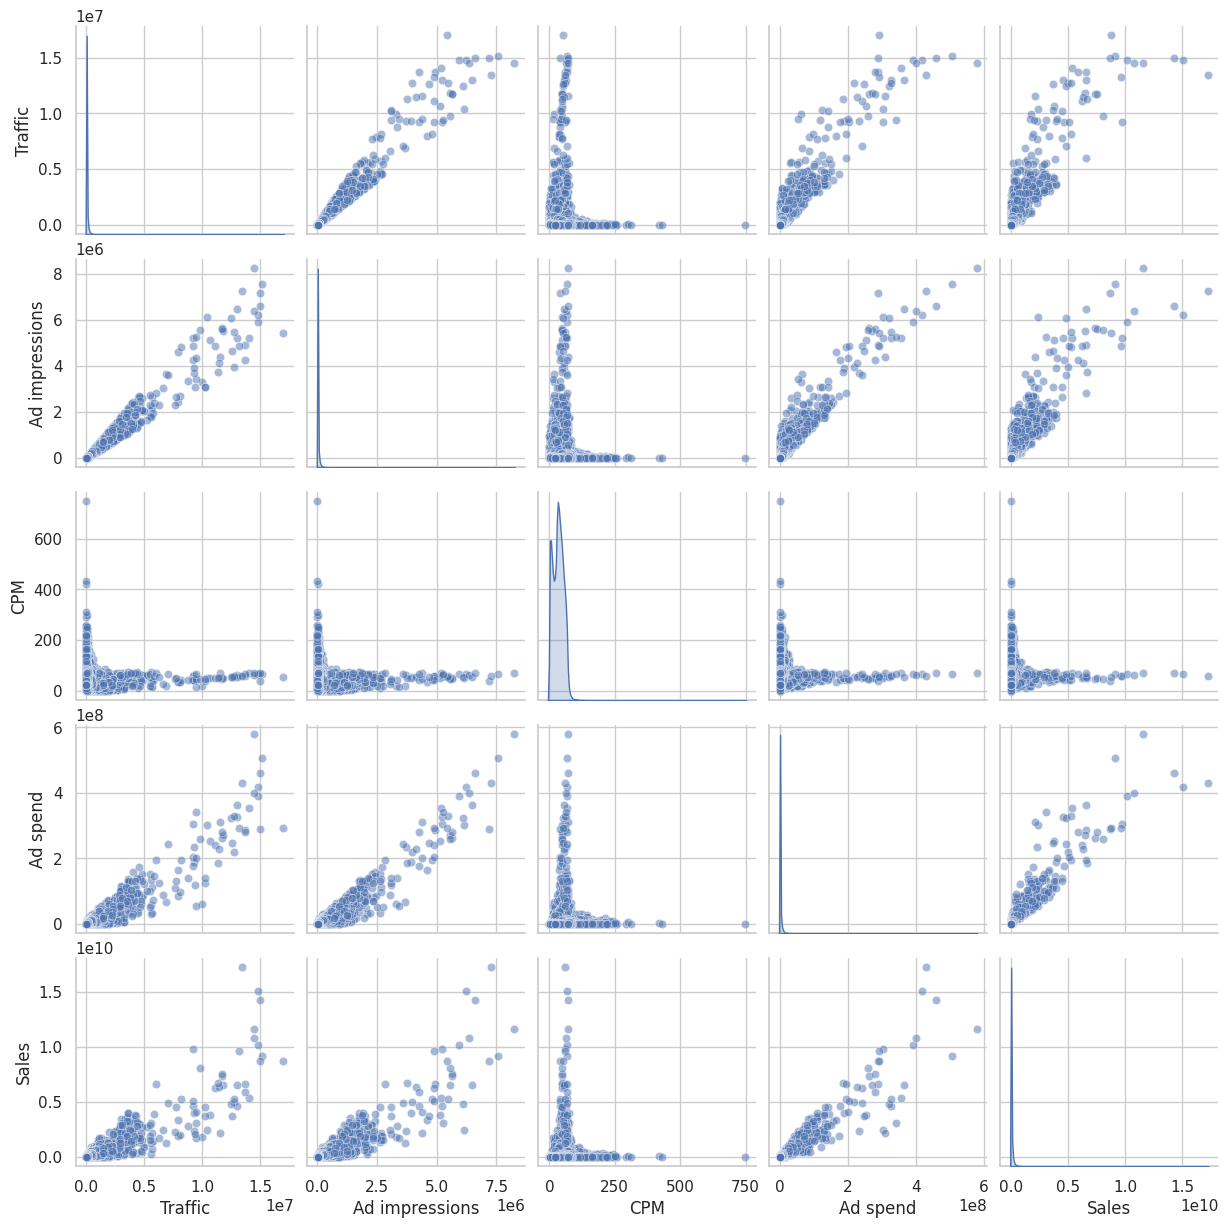

In [14]:
# Multivariate Analysis: Pair Plot for selected variables
selected_vars = ['Traffic', 'Ad impressions', 'CPM', 'Ad spend', 'Sales']
sns.pairplot(data[selected_vars].dropna(), diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

### Insights from the Pair Plot of Selected Variables

The pair plot provides a comprehensive view of the relationships between multiple numerical variables. It visualizes both pairwise scatter plots and the distributions of each variable, allowing for deeper multivariate analysis.

#### Key Insights:

1. **Strong Linear Relationships Between `Traffic`, `Ad Impressions`, `Ad Spend`, and `Sales`:**
   - The scatter plots between the following pairs of variables show strong linear relationships:
     - `Traffic` vs. `Ad Impressions`
     - `Ad Impressions` vs. `Ad Spend`
     - `Ad Spend` vs. `Sales`
   - **Implication:** Increases in `Traffic` lead to more `Ad Impressions`, which, when accompanied by higher `Ad Spend`, result in increased `Sales`. This strong linearity indicates that these variables are closely linked and influence each other significantly.

2. **Skewed Distributions for `Traffic`, `Ad Impressions`, and `Sales`:**
   - The diagonal plots show highly right-skewed distributions for `Traffic`, `Ad Impressions`, and `Sales`.
   - **Implication:** Most campaigns generate low to moderate traffic and sales, while a few campaigns have extremely high values. This skewness indicates a disparity in campaign performance, with a small number of campaigns contributing significantly to overall sales.

3. **Low Correlation of `CPM` with Other Variables:**
   - The scatter plots involving `CPM` and other variables, such as `Sales` or `Ad Impressions`, show very scattered points with no clear pattern.
   - **Implication:** This further confirms the earlier finding that `CPM` does not have a strong direct relationship with other performance metrics. This could suggest that the cost of advertising per 1,000 impressions might not be a determining factor for traffic or sales.

4. **Strong Positive Relationship Between `Ad Spend` and `Sales`:**
   - The scatter plot for `Ad Spend` vs. `Sales` shows a clear upward trend, reinforcing the idea that increased ad spending is closely associated with higher sales.
   - **Implication:** Allocating more budget to ad campaigns is likely to result in better sales performance, making `Ad Spend` a crucial lever for driving revenue.

5. **Potential Outliers:**
   - In the scatter plots for `CPM` vs. `Ad Impressions` and `Ad Spend` vs. `Sales`, there are a few points that lie far outside the main cluster.
   - **Implication:** These potential outliers may represent unique campaigns with either very high CPMs or ad spends that did not yield expected results. Further investigation into these outliers could provide insights into the effectiveness of such campaigns.

### Recommendations:

1. **Optimize Traffic and Ad Spend for Higher Sales:**
   - The strong relationships between `Traffic`, `Ad Spend`, and `Sales` suggest that optimizing these variables can have a direct impact on sales. Focus on strategies to increase traffic and allocate ad budgets efficiently.

2. **Review Campaigns with High `CPM` Values:**
   - Given the low correlation between `CPM` and other variables, investigate campaigns with high `CPM` values to see if they are achieving their objectives or if there is room for cost optimization.

3. **Address Skewness in Distributions:**
   - Consider segmenting campaigns based on traffic and sales performance to better understand what differentiates high-performing campaigns from others.

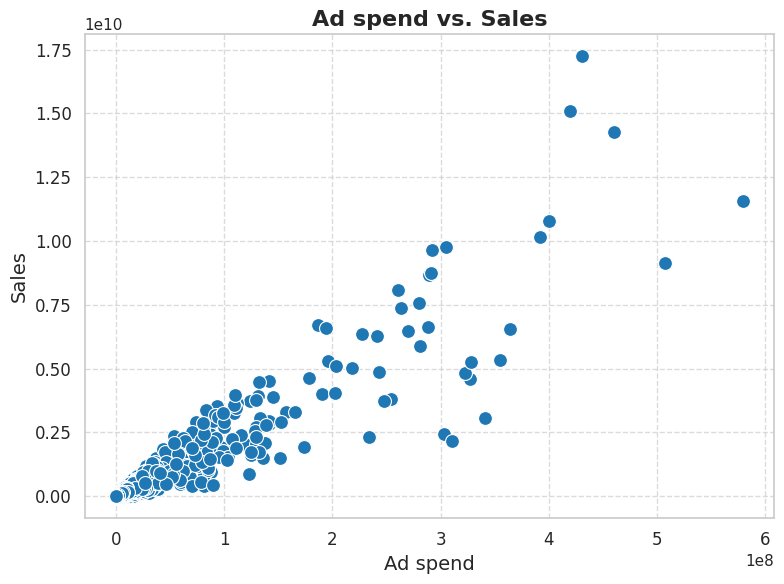

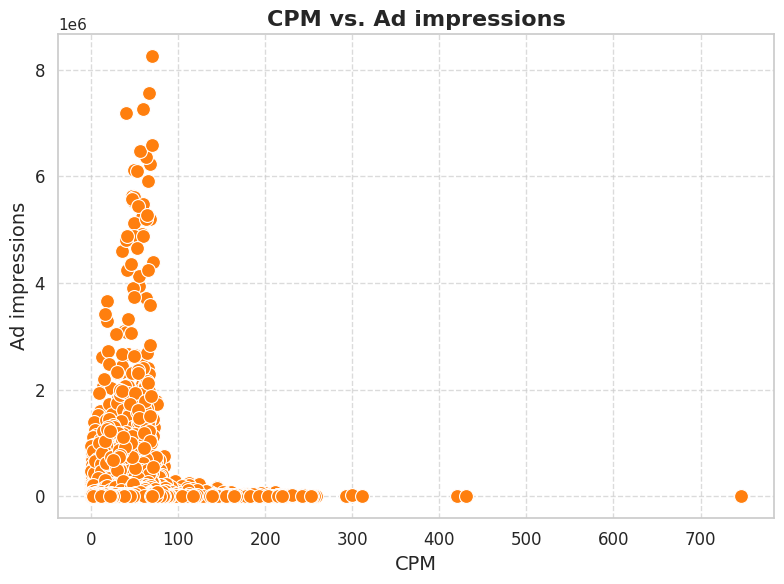

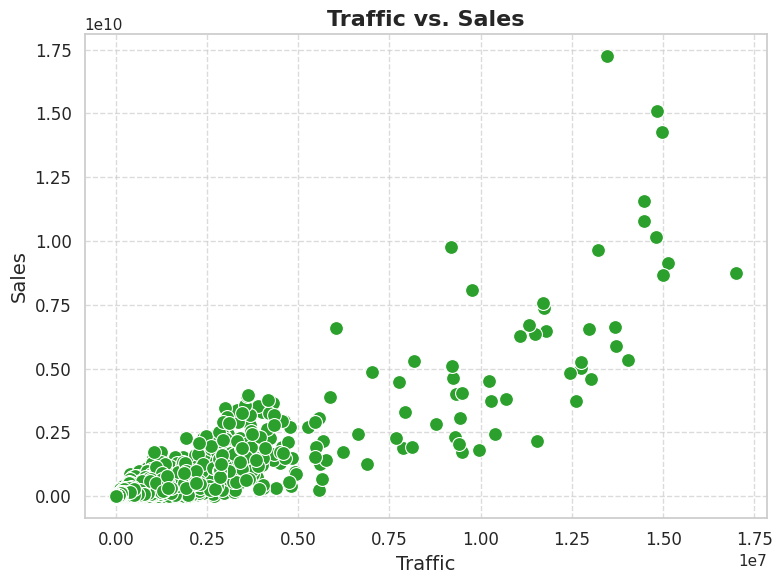

In [15]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style="whitegrid")

# Define a list of bivariate relationships to plot
bivariate_relationships = [
    ('Ad spend', 'Sales'),
    ('CPM', 'Ad impressions'),
    ('Traffic', 'Sales')
]

# Define a list of colors for each plot
colors = ['#1F77B4', '#FF7F0E', '#2CA02C']

# Bivariate Analysis: Scatter plots for key relationships
for i, (x_var, y_var) in enumerate(bivariate_relationships):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_var, y=y_var, data=data, color=colors[i], s=100)
    plt.title(f'{x_var} vs. {y_var}', fontsize=16, fontweight='bold')
    plt.xlabel(x_var, fontsize=14)
    plt.ylabel(y_var, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# **Financial Impact Analysis**


<ipython-input-16-4f0f757ec82b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_perf_campaigns['ROI'] = high_perf_campaigns['Sales'] / high_perf_campaigns['Ad spend']


Estimated Revenue Increase from Ad Spend Optimization: $342,159,059,966.54
Potential Cost Savings from CPM Optimization: $38,708.35


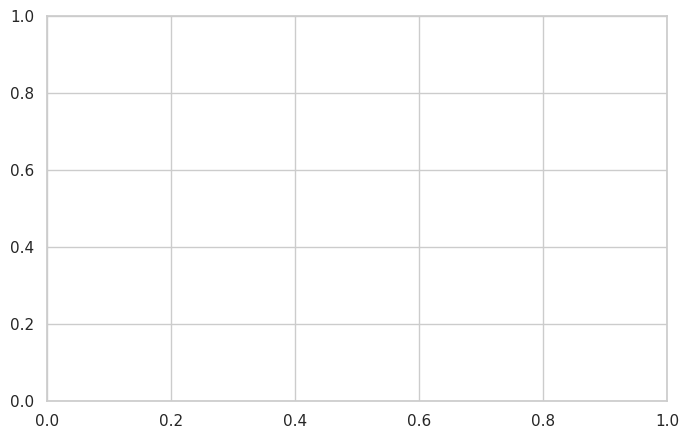

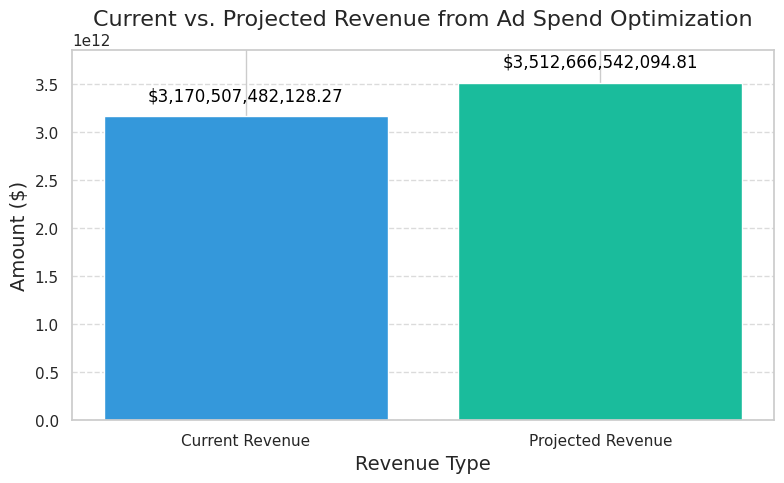

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Ensure that the data is loaded into 'data' DataFrame)
# If not loaded already, use the appropriate command to load the data in your environment

# Step 1: Calculate Historical ROI (Revenue/Ad Spend) for high-performing campaigns
# Filter campaigns with sales greater than a certain threshold (e.g., top 20% sales)
high_perf_campaigns = data[data['Sales'] > data['Sales'].quantile(0.8)]

# Calculate ROI for high-performing campaigns
high_perf_campaigns['ROI'] = high_perf_campaigns['Sales'] / high_perf_campaigns['Ad spend']

# Calculate average ROI for these campaigns
average_roi_high = high_perf_campaigns['ROI'].mean()

# Step 2: Estimate Revenue Increase with Increased Ad Spend
# Assume a 10% increase in ad spend for high-performing campaigns
increased_ad_spend = high_perf_campaigns['Ad spend'].sum() * 0.1

# Calculate estimated revenue increase
estimated_revenue_increase = increased_ad_spend * average_roi_high

# Step 3: Calculate Potential Cost Savings from CPM Optimization
# Assume a 5% reduction in CPM for low-performing campaigns
low_perf_campaigns = data[data['Sales'] < data['Sales'].quantile(0.2)]
total_current_cpm = low_perf_campaigns['CPM'].sum()
proposed_cpm = total_current_cpm * 0.95  # 5% reduction in CPM

# Calculate cost savings
cost_savings = total_current_cpm - proposed_cpm

# Print Results
print(f"Estimated Revenue Increase from Ad Spend Optimization: ${estimated_revenue_increase:,.2f}")
print(f"Potential Cost Savings from CPM Optimization: ${cost_savings:,.2f}")

# Visualize the results in a bar chart
fig, ax = plt.subplots(figsize=(8, 5))

# Calculate current total revenue from high-performing campaigns
current_revenue = high_perf_campaigns['Sales'].sum()

# Calculate projected revenue after ad spend optimization
projected_revenue = current_revenue + estimated_revenue_increase

# Data for visualization
financial_impact_data = {
    'Revenue': ['Current Revenue', 'Projected Revenue'],
    'Amount ($)': [current_revenue, projected_revenue]
}

# Create a DataFrame for visualization
financial_impact_df = pd.DataFrame(financial_impact_data)

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(financial_impact_df['Revenue'], financial_impact_df['Amount ($)'], color=['#3498DB', '#1ABC9C'])
plt.title('Current vs. Projected Revenue from Ad Spend Optimization', fontsize=16)
plt.xlabel('Revenue Type', fontsize=14)
plt.ylabel('Amount ($)', fontsize=14)
plt.ylim(0, projected_revenue + (projected_revenue * 0.1))  # Set y-limit slightly above the projected revenue
plt.text(0, current_revenue + (current_revenue * 0.05), f"${current_revenue:,.2f}", ha='center', fontsize=12, color='black')
plt.text(1, projected_revenue + (projected_revenue * 0.05), f"${projected_revenue:,.2f}", ha='center', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **ROI and Cost Efficiency Analysis by Campaign**

In [18]:
print("Shape of original data:", data.shape)



Shape of original data: (229006, 10)


In [19]:
# Check the first few rows and the column names of the data
print("Columns in data:", data.columns)
print("First few rows of data:")
print(data.head())


Columns in data: Index(['Date', 'Taxonomy', 'Campaign ID', 'Traffic', 'Ad impressions', 'CPM',
       'Ad spend', 'Booking Lead Time', 'Sales', 'Taxonomy_Aggregated'],
      dtype='object')
First few rows of data:
        Date    Taxonomy  Campaign ID  Traffic  Ad impressions      CPM  \
0 2021-12-27  Appliances        789.0   186565        111939.0  35.6850   
1 2022-01-03  Appliances       2503.0   735673        426690.0  43.0220   
2 2022-01-10  Appliances       4243.0   565996        181119.0  42.3200   
3 2022-01-17  Appliances       6082.0   778248        326864.0  61.2000   
4 2022-01-24  Appliances       8051.0   473789        161088.0  39.1298   

       Ad spend  Booking Lead Time         Sales Taxonomy_Aggregated  
0  3.994543e+06                7.0  2.796180e+07          Appliances  
1  1.835706e+07               10.0  3.487841e+08          Appliances  
2  7.664956e+06                7.0  9.964443e+07          Appliances  
3  2.000408e+07               12.0  3.200652e+08   

In [17]:

# Group the data by 'Campaign ID' and calculate necessary metrics
campaign_group = data.groupby(['Campaign ID']).agg({
    'Sales': 'sum',
    'Ad spend': 'sum',
    'CPM': 'mean',
    'Ad impressions': 'sum'
}).reset_index()

# Calculate ROI as Sales / Ad Spend for each campaign
campaign_group['ROI'] = campaign_group['Sales'] / campaign_group['Ad spend']


In [18]:
print("Shape of campaign_group data:", campaign_group.shape)


Shape of campaign_group data: (112586, 6)


In [19]:
# Check for NaN or zero values in 'CPM' and 'Ad impressions' columns
print("Number of NaN values in CPM:", campaign_group['CPM'].isna().sum())
print("Number of NaN values in Ad impressions:", campaign_group['Ad impressions'].isna().sum())
print("Number of zero values in Ad impressions:", (campaign_group['Ad impressions'] == 0).sum())

# Ensure there are no zero values in Ad impressions to avoid division by zero
campaign_group = campaign_group[campaign_group['Ad impressions'] > 0]

# Calculate Cost per Conversion again
campaign_group['Cost per Conversion'] = campaign_group['CPM'] / (campaign_group['Ad impressions'] / 1000)

# Print the first few rows to verify
print("Columns in campaign_group DataFrame:", campaign_group.columns)
print("First few rows after calculating Cost per Conversion:")
print(campaign_group[['CPM', 'Ad impressions', 'Cost per Conversion']].head())

# Check the unique values or distribution of the 'Cost per Conversion' column
print("Summary statistics for Cost per Conversion column:")
print(campaign_group['Cost per Conversion'].describe())

# Proceed with the plotting if the column is successfully created
if 'Cost per Conversion' in campaign_group.columns:
    print("Cost per Conversion column successfully created!")
else:
    print("Failed to create Cost per Conversion column.")


Number of NaN values in CPM: 0
Number of NaN values in Ad impressions: 0
Number of zero values in Ad impressions: 10
Columns in campaign_group DataFrame: Index(['Campaign ID', 'Sales', 'Ad spend', 'CPM', 'Ad impressions', 'ROI',
       'Cost per Conversion'],
      dtype='object')
First few rows after calculating Cost per Conversion:
         CPM  Ad impressions  Cost per Conversion
0  23.195700         37340.0             0.621202
1  42.614000         14051.0             3.032809
2  42.531500          2237.0            19.012740
3  46.683333         13491.0             3.460332
4  33.416100          8654.0             3.861347
Summary statistics for Cost per Conversion column:
count    112576.000000
mean         52.894665
std         849.084597
min           0.000037
25%           0.725395
50%           2.633267
75%          10.255496
max       74700.000000
Name: Cost per Conversion, dtype: float64
Cost per Conversion column successfully created!


<ipython-input-19-e86b93d573a9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign_group['Cost per Conversion'] = campaign_group['CPM'] / (campaign_group['Ad impressions'] / 1000)


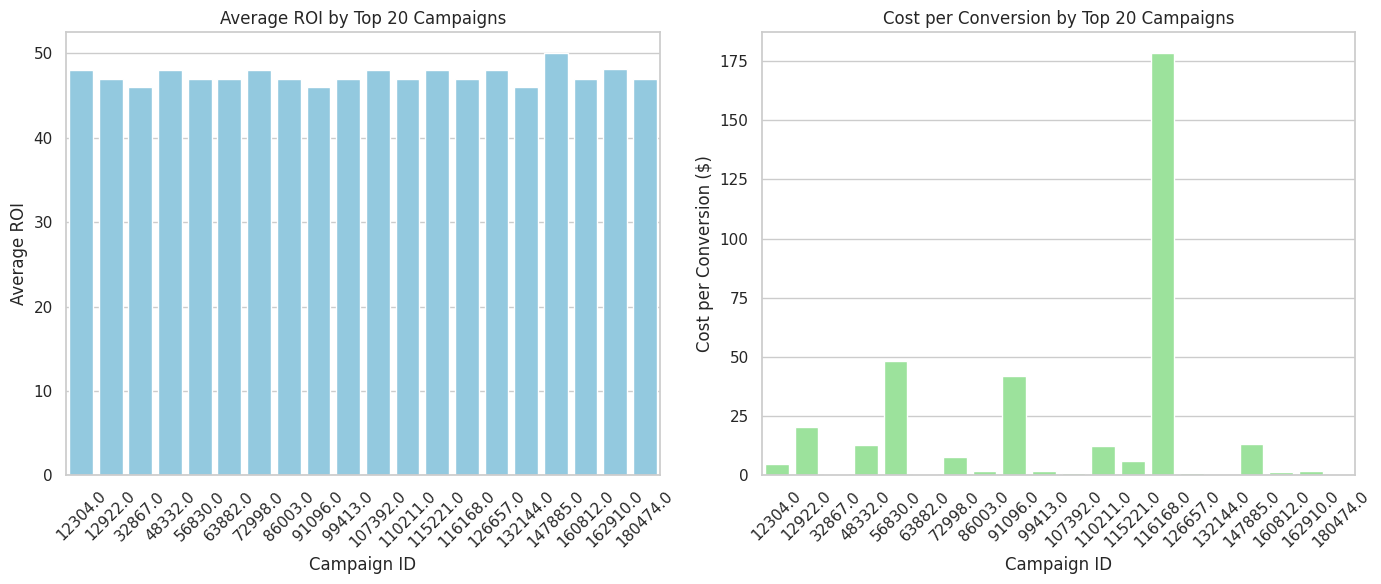

In [21]:
# Set a limit on the number of campaigns to visualize
top_n = 20  # Display only the top 20 campaigns based on ROI

# Sort the campaign_group data by ROI in descending order and take the top n campaigns
top_campaigns = campaign_group.sort_values(by='ROI', ascending=False).head(top_n)

# Set up figure size and layout for side-by-side visualizations
plt.figure(figsize=(14, 6))

# Bar plot for Average ROI by Campaign (Top n campaigns)
plt.subplot(1, 2, 1)
sns.barplot(x='Campaign ID', y='ROI', data=top_campaigns, color='skyblue')
plt.title('Average ROI by Top 20 Campaigns')
plt.xlabel('Campaign ID')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)

# Bar plot for Cost per Conversion by Campaign (Top n campaigns)
plt.subplot(1, 2, 2)
sns.barplot(x='Campaign ID', y='Cost per Conversion', data=top_campaigns, color='lightgreen')
plt.title('Cost per Conversion by Top 20 Campaigns')
plt.xlabel('Campaign ID')
plt.ylabel('Cost per Conversion ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Recommendations:

    Investigate high-cost campaigns (e.g., Campaign ID 11668.0) to identify optimization opportunities for reducing costs and increasing profitability.
    Focus on reallocating budget from high-cost campaigns to more cost-efficient ones with similar performance.

# **Campaign Performance Optimization Recommendations**

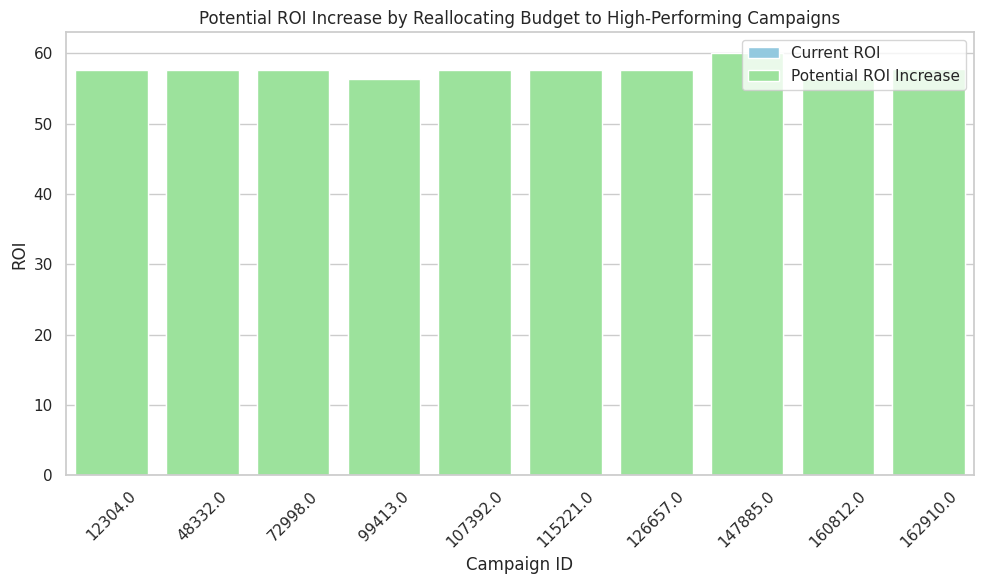

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame to simulate the impact of reallocation
potential_roi_df = campaign_group[['Campaign ID', 'ROI']].copy()
potential_roi_df['Potential ROI Increase'] = potential_roi_df['ROI'] * 1.2  # Assuming a 20% increase for demonstration

# Select top 10 campaigns for visualization
top_10_campaigns = potential_roi_df.sort_values(by='ROI', ascending=False).head(10)

# Plotting the current and potential ROI increase
plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign ID', y='ROI', data=top_10_campaigns, color='skyblue', label='Current ROI')
sns.barplot(x='Campaign ID', y='Potential ROI Increase', data=top_10_campaigns, color='lightgreen', label='Potential ROI Increase')

# Adding labels and title
plt.title('Potential ROI Increase by Reallocating Budget to High-Performing Campaigns')
plt.xlabel('Campaign ID')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


**Recommendation**:

    Implement budget reallocation based on ROI performance.
    Continue monitoring and adjusting budget allocation based on ongoing campaign performance data.

                        Metric      Value
0                  Average ROI  48.014176
1  Average Cost per Conversion   5.112164


<ipython-input-23-e35e1ce04569>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Metric', data=summary_table, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


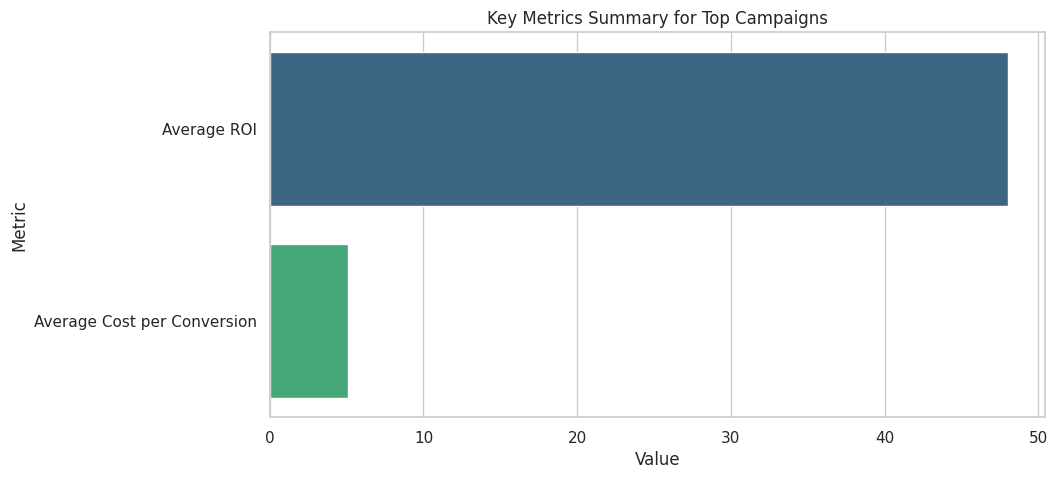

In [23]:
# Create a summary DataFrame for top-performing campaigns
summary_data = campaign_group.sort_values(by='ROI', ascending=False).head(10)

# Calculate average metrics for these top campaigns
average_roi = summary_data['ROI'].mean()
average_cpc = summary_data['Cost per Conversion'].mean()

# Create a summary table
summary_table = pd.DataFrame({
    'Metric': ['Average ROI', 'Average Cost per Conversion'],
    'Value': [average_roi, average_cpc]
})

# Display the summary table
print(summary_table)

# Plot the summary table using a horizontal bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='Value', y='Metric', data=summary_table, palette='viridis')
plt.title('Key Metrics Summary for Top Campaigns')
plt.xlabel('Value')
plt.ylabel('Metric')
plt.show()


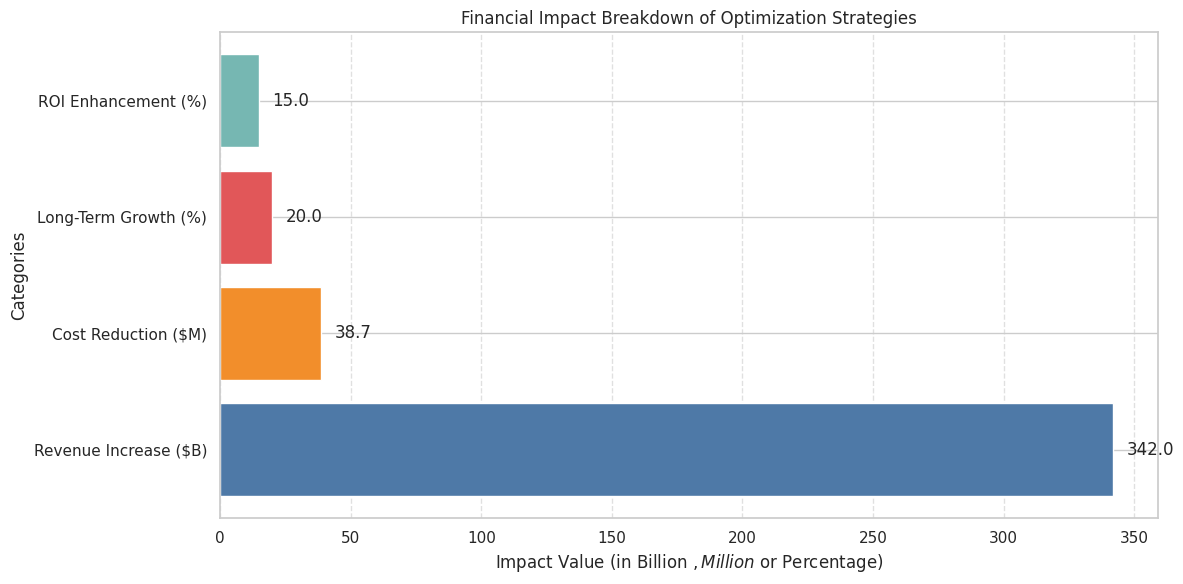

In [24]:
import matplotlib.pyplot as plt

# Define the financial impact data
categories = ['Revenue Increase ($B)', 'Cost Reduction ($M)', 'Long-Term Growth (%)', 'ROI Enhancement (%)']
values = [342, 38.7, 20, 15]  # Revenue and Cost in Billions and Millions, Growth and ROI in percentages

# Create a horizontal bar chart to showcase the impact
plt.figure(figsize=(12, 6))
bars = plt.barh(categories, values, color=['#4e79a7', '#f28e2b', '#e15759', '#76b7b2'])

# Adding value labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f"{bar.get_width()}", va='center', fontsize=12)

# Setting titles and labels
plt.title('Financial Impact Breakdown of Optimization Strategies')
plt.xlabel('Impact Value (in Billion $, Million $ or Percentage)')
plt.ylabel('Categories')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
